In [29]:
"""
Created on Wed Oct  3 14:47:19 2018

@author: Jessie
"""
%matplotlib inline
from __future__ import print_function
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from IPython.display import Image

trainx = pd.read_csv("/Users/Legendary/Documents/GitHub/DataCollection/Data/LR Data/train-x.csv")
trainy = pd.read_csv("/Users/Legendary/Documents/GitHub/DataCollection/Data/LR Data/train-y.csv")
testx = pd.read_csv("/Users/Legendary/Documents/GitHub/DataCollection/Data/LR Data/test-x.csv")
testy = pd.read_csv("/Users/Legendary/Documents/GitHub/DataCollection/Data/LR Data/test-y.csv")

testy.head()



,jade date,y-val
0,43276,16.036820
1,43277,11.399772
2,43278,10.377035
3,43279,10.337987
4,43280,11.928215


In [30]:
#Import Lin reg from sci=kit module
from sklearn.linear_model import LinearRegression
#drop date from the independent variables
Y_Train = trainy.drop('Date', axis =1)
X_Train = trainx.drop('dummy-y-val', axis=1)
Y_Test  = testy.drop('jade date',axis =1)
X_Test = testx.drop('dummy-y-val', axis=1)

X_Test.head()
#Y_Test.head()
#X_Train.head()
#Y_Train.head()
#pred_test = lm.predict(testx)


,Date,sales,walmart,amazon,store,stores,retail,brands,retailer,earnings,...,penney,june,expects,consumers,reported,technology,wall,farms,cramer,dunkin
0,43276,1,0,0,0,1,0,1,0,0,...,0,12,1,1,2,12,3,0,0,0
1,43277,10,0,1,2,0,1,0,0,0,...,0,7,2,0,0,2,0,0,0,0
2,43278,3,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2,0,0,0
3,43279,15,1,11,0,0,2,3,0,0,...,0,3,2,2,4,2,3,0,0,0
4,43280,3,0,0,0,0,0,0,0,4,...,0,7,1,1,1,0,2,0,0,0


In [31]:
#Testing with dummy-y-variable
lm = LinearRegression()
lm.fit(trainx, Y_Train)
pred_train = lm.predict(trainx)
lm.coef_
print(pred_train[0:5]) #print first 5 predictions
lm.score(trainx,Y_Train) #r2 value 

[[12.21961581]
 [11.40657003]
 [11.10485269]
 [11.27574925]
 [10.22957877]]


1.0

In [32]:
#Predicting on Training Set only
lm2 = LinearRegression()
lm2.fit(X_Train,Y_Train)
pred_train = lm2.predict(X_Train)
lm2.coef_
print(pred_train[0:5]) #print first 5 predictions
lm2.score(X_Train,Y_Train) #r2 value 

[[12.50124111]
 [ 9.93012942]
 [11.96879484]
 [13.63223537]
 [10.13784641]]


0.5908185422545946

In [33]:
#Double check size
print (X_Train.shape)
print (X_Test.shape)
print (Y_Train.shape)
print (Y_Test.shape)

(155, 101)
(68, 101)
(155, 1)
(68, 1)


In [34]:
#Train-Test split
lm3 = LinearRegression()
lm3.fit(X_Train, Y_Train)
pred_train = lm3.predict(X_Train)
pred_test = lm3.predict(X_Test)
lm3.coef_
print(pred_test[0:5]) #print first 5 predictions
#lm3.score(X_Train,Y_Train) #r2 value 
lm3.score(X_Test,Y_Test)

[[ 8.73746082]
 [ 7.30979978]
 [12.34363721]
 [ 9.2585807 ]
 [ 7.91484667]]


-2.5744713237298016

In [35]:
#Error Values
MSEtrain = np.mean((Y_Train - lm2.predict(X_Train)) ** 2)
MSEtesttrain = np.mean((Y_Test - lm3.predict(X_Test)) **2)
print ('Fit a model X_train, and calculate MSE and R2 with Y_train:',MSEtrain, lm2.score(X_Train,Y_Train)) #r2 value  )
print ('Fit a model X_train, and calculate MSE and R2 with X_test, Y_test:', MSEtesttrain, lm3.score(X_Test,Y_Test))

Fit a model X_train, and calculate MSE and R2 with Y_train: y-val    8.385785
dtype: float64 0.5908185422545946
Fit a model X_train, and calculate MSE and R2 with X_test, Y_test: y-val    51.892047
dtype: float64 -2.5744713237298016


Text(0.5,0,'Y predictions')

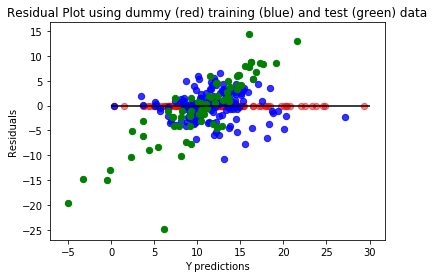

In [40]:
#Residual plots
plt.scatter(lm.predict(trainx), lm.predict(trainx) - Y_Train, c='r', s=40, alpha = 0.5)
plt.scatter(lm2.predict(X_Train), lm2.predict(X_Train) - Y_Train, c='b', s=40, alpha=0.8)
plt.scatter(lm3.predict(X_Test), lm3.predict(X_Test) - Y_Test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=30)
plt.title('Residual Plot using dummy (red) training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.xlabel('Y predictions')

In [ ]:
#ignore for now
print ('Estimated intercept coeff:', lm.intercept_)
print ('Numer of coeff:', len(lm.coef_))

In [ ]:
#ignore for now
pd.DataFrame(list(zip(trainx.columns,lm.coef_)), columns = ['features','estimatedCoefficients'])